# Multinomial Logistic regression exmple with MNIST data set
---

Imports

In [4]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import tensorflow as tf
import keras
import numpy as np
import cv2
from matplotlib import pyplot as plt


## Pre process data
---
Load MNIST data set (images with numbers)

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

h_image = np.shape(X_train)[1]
w_image = np.shape(X_train)[2]

num_classes = 10


Convert 1-dimensional class arrays to 10-dimensional class matrices

In [6]:
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

## Create machine learning model
1. First layer - flatten layer. This layer get the input features (Every pixel is a feature) as 2-D and flatten it to 1-D.
2. Second layer - dense layer. This layer take the previews layer and do a calculation for the number of outputs that we want. In this example we use the [softmax](https://stats.stackexchange.com/questions/233658/softmax-vs-sigmoid-function-in-logistic-classifier) activation function for multinomial logistic regression.

The optimizer that we use is [Adam](https://medium.com/syncedreview/iclr-2019-fast-as-adam-good-as-sgd-new-optimizer-has-both-78e37e8f9a34) and categorical crossentropy for the multinomial logistic regression.


In [7]:
model_numbers = keras.Sequential([
    keras.layers.Flatten(input_shape=(h_image,w_image)),  # input layer (1)
    keras.layers.Dense(num_classes, activation='softmax') # output layer (2)  
])


model_numbers.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



## Train the model
---
The model take X_train in shape of (number_of_trains,hight_of_image,width_of_image) and Y_train in shape of (number_of_trains,num_of_classes,num_of_classes). The Y train is One hot matrix.

In [8]:
model_numbers.fit(X_train, Y_train, epochs=3)


test_loss, test_acc = model_numbers.evaluate(X_test,  Y_test, verbose=1) 

print('Test accuracy:', test_acc)

predictions_of_test = model_numbers.predict(X_train)
predictions_of_test = np.argmax(predictions_of_test, axis=1)
predictions_of_train = model_numbers.predict(X_test)
predictions_of_train = np.argmax(predictions_of_train, axis=1)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 9.7265 - accuracy: 0.8400
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 6.1088 - accuracy: 0.8776
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 5.9179 - accuracy: 0.8851
Test accuracy: 0.8851000070571899


## Preview predicted image
--- 

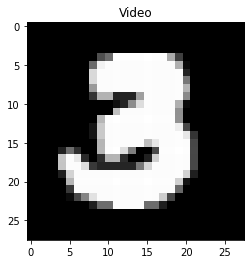

3

In [9]:
def show_img_in_notebook(frame):
    RGB_im = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    
    plt.imshow(RGB_im)
    plt.title("Video")
    plt.show()
    
test = 200
show_img_in_notebook(X_test[test,:,:])
predictions_of_train[test]

Text(0.5, 257.44, 'Predicted label')

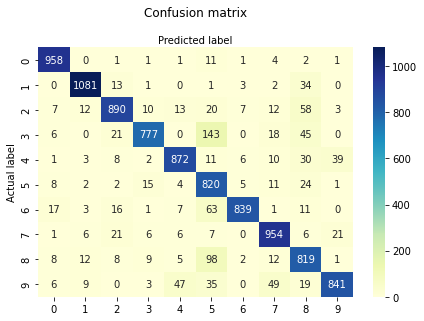

In [10]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions_of_train)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Image augmenting
---
The image augmenting is based on this [link](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

In [11]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
X_train_4 = X_train.reshape(X_train.shape + (1,))

# train_generator = train_datagen.flow(X_train_4,Y_train,batch_size=batch_size,shuffle=True, save_to_dir='preview', save_prefix='num_test', save_format='jpeg')

train_generator = train_datagen.flow(X_train_4,Y_train,batch_size=batch_size,shuffle=True)


X_test_4 = X_test.reshape(X_test.shape + (1,))
# this is a similar generator, for validation data
# validation_generator = test_datagen.flow(X_test_4,Y_test,batch_size=batch_size,shuffle=True, save_to_dir='preview', save_prefix='num_train', save_format='jpeg')

validation_generator = test_datagen.flow(X_test_4,Y_test,batch_size=batch_size,shuffle=True)

## Model training
---

In [12]:
model_numbers.fit(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model_numbers.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/50
125/125 [==============================] - 2s 15ms/step - loss: 1.5914 - accuracy: 0.6080 - val_loss: 1.5315 - val_accuracy: 0.7237
Epoch 2/50
125/125 [==============================] - 2s 16ms/step - loss: 1.5099 - accuracy: 0.7175 - val_loss: 1.4921 - val_accuracy: 0.7825
Epoch 3/50
125/125 [==============================] - 2s 14ms/step - loss: 1.4833 - accuracy: 0.7310 - val_loss: 1.4573 - val_accuracy: 0.8150
Epoch 4/50
125/125 [==============================] - 2s 13ms/step - loss: 1.4416 - accuracy: 0.7445 - val_loss: 1.4307 - val_accuracy: 0.8375
Epoch 5/50
125/125 [==============================] - 2s 16ms/step - loss: 1.4230 - accuracy: 0.7670 - val_loss: 1.3750 - val_accuracy: 0.8425
Epoch 6/50
125/125 [==============================] - 1s 11ms/step - loss: 1.3903 - accuracy: 0.7730 - val_loss: 1.3726 - val_accuracy: 0.8462
Epoch 7/50
125/125 [==============================] - 1s 12ms/step - loss: 1.3782 - accuracy: 0.7670 - val_loss: 1.3428 - val_accuracy: 0.8575

In [13]:
test_loss, test_acc = model_numbers.evaluate(X_test,  Y_test, verbose=1) 

print('Test accuracy:', test_acc)

predictions_of_test = model_numbers.predict(X_train)
predictions_of_test = np.argmax(predictions_of_test, axis=1)
predictions_of_train = model_numbers.predict(X_test)
predictions_of_train = np.argmax(predictions_of_train, axis=1)

313/313 [==============================] - 0s 1ms/step - loss: 36.3743 - accuracy: 0.8549
Test accuracy: 0.8549000024795532


Text(0.5, 257.44, 'Predicted label')

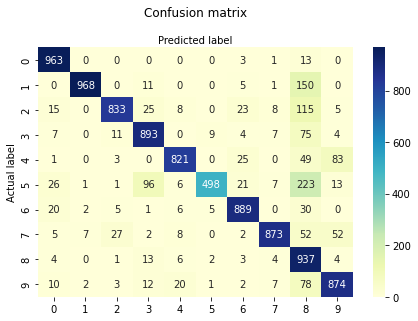

In [14]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions_of_train)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')